In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

In [3]:
#Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira
bean_seker = df[df['Class'] == 'SEKER']
bean_barbunya = df[df['Class'] == 'BARBUNYA']
bean_bombay = df[df['Class'] == 'BOMBAY']
bean_cali = df[df['Class'] == 'CALI']
bean_dermosan = df[df['Class'] == 'DERMOSAN']
bean_horoz = df[df['Class'] == 'HOROZ']
bean_sira = df[df['Class'] == 'SIRA']

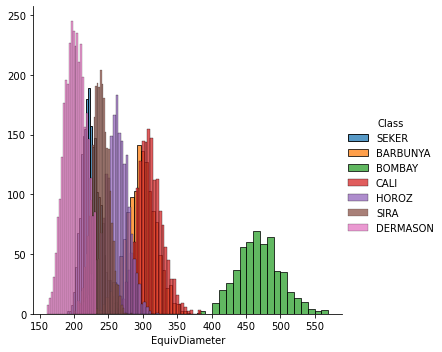

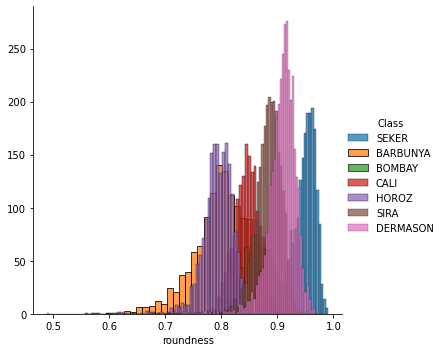

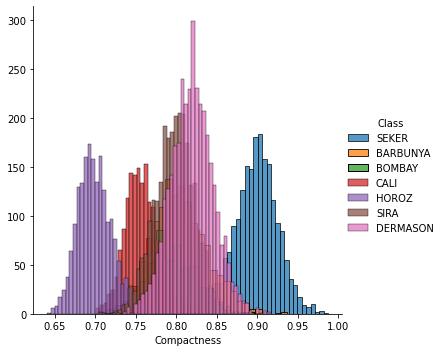

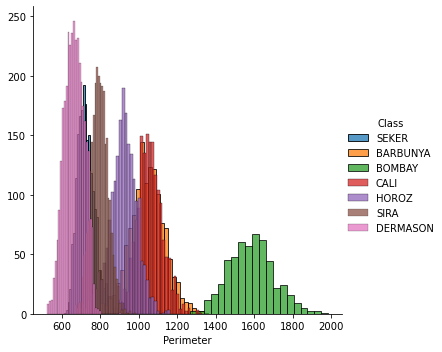

In [4]:
# EquivDiameter
sns.FacetGrid(df, hue="Class", height=5) \
   .map(sns.histplot, "EquivDiameter") \
   .add_legend();
# Roundness
sns.FacetGrid(df, hue="Class", height=5) \
   .map(sns.histplot, "roundness") \
   .add_legend();
# Compactness
sns.FacetGrid(df, hue="Class", height=5) \
   .map(sns.histplot, "Compactness") \
   .add_legend();
# Perimeter
sns.FacetGrid(df, hue="Class", height=5) \
   .map(sns.histplot, "Perimeter") \
   .add_legend();
plt.show()

In [5]:
data = df.to_numpy()
X = data[:, 0:16]
y = data[:, 16]

print(X.shape)
print('Class labels:', np.unique(y))

(13611, 16)
Class labels: ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.28, random_state=None, stratify=y)
print(X_train.shape)
print(X_test.shape)

(9799, 16)
(3812, 16)


In [7]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Logistic Regression

C:\Users\Matthew Zlibut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10.0)
{'C': 10.0}
Accuracy training:  0.924380459027329
Accuracy test:  0.9239244491080797
 TN, FN,
 FP, TP
 [[ 862    0   58    0    3    6   23]
 [   0  376    0    0    0    0    0]
 [  36    0 1105    0   21    3    8]
 [   0    0    0 2341    5   38  169]
 [   2    0   22   12 1319    0   33]
 [  12    0    1   22    1 1386   37]
 [   2    0    5  159   26   23 1683]]
 TN, FN,
 FP, TP
 [[343   0  15   0   1   2   9]
 [  0 146   0   0   0   0   0]
 [ 13   0 430   0   6   1   7]
 [  1   0   0 903   7  11  71]
 [  2   0   4   5 520   0   9]
 [  8   0   1   6   0 531  22]
 [  2   0   4  59  13  11 649]]


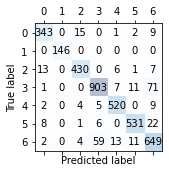

In [8]:
from sklearn.linear_model import LogisticRegression

#setting up the hyperparameter grid
param_grid = [{'C': np.logspace(-4, 2, 7)}]
lr = LogisticRegression()
#using gridsearch cross validation in order to find the best hyperparameters
gs = GridSearchCV(estimator=lr, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=10,
    n_jobs=-1)
gs.fit(X_train_std, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
lr = gs.best_estimator_

lr_t_acc = gs.best_score_
print('Accuracy training: ', lr_t_acc)
y_pred_train = gs.best_estimator_.predict(X_train_std)
y_pred_test = gs.best_estimator_.predict(X_test_std)
lr_acc = accuracy_score(y_test, y_pred_test)

print('Accuracy test: ', lr_acc)


#the confusion matrix for training and testing data
print(' TN, FN,\n FP, TP\n', confusion_matrix(y_train, y_pred_train))
print(' TN, FN,\n FP, TP\n', confusion_matrix(y_test, y_pred_test))
confmat = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

### Support Vector Machine

In [9]:
from sklearn.svm import SVC

#setting the range for c and gamma
C_range = np.logspace(-4, 2, 7)
gamma_range = np.logspace(-4, 2, 7)

#setting up the parameters with their respective kernels
param_grid = [{'C': C_range, 'kernel': ['linear']},
    {'C': C_range, 
    'gamma': gamma_range, 
    'kernel': ['rbf']}]

svc = SVC()
#setting up the gridsearch cross validation
gs = GridSearchCV(estimator=svc, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=10,
    n_jobs=-1)

gs.fit(X_train_std, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
svc = gs.best_estimator_

# Calculate the scores of training and testing data
svm_t_acc = gs.best_score_
print('Accuracy: ', svm_t_acc)

y_pred_train = gs.best_estimator_.predict(X_train_std)
y_pred_test = gs.best_estimator_.predict(X_test_std)

svm_acc = accuracy_score(y_test, y_pred_test)

print('Accuracy test: ', svm_acc)

#confusion matrix for training and testing
print(' TN, FN,\n FP, TP\n', confusion_matrix(y_train, y_pred_train))
print(' TN, FN,\n FP, TP\n', confusion_matrix(y_test, y_pred_test))

SVC(C=10.0, gamma=0.1)
{'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy:  0.9322380188030268
Accuracy test:  0.9278593913955928
 TN, FN,
 FP, TP
 [[ 903    0   30    0    1    6   12]
 [   0  376    0    0    0    0    0]
 [  25    0 1131    0    9    3    5]
 [   0    0    0 2400    1   29  123]
 [   2    0   15   12 1330    0   29]
 [   3    0    1   25    0 1401   29]
 [   3    0    1  168   19   15 1692]]
 TN, FN,
 FP, TP
 [[345   0  13   0   3   4   5]
 [  0 146   0   0   0   0   0]
 [ 12   0 432   0   8   1   4]
 [  0   0   0 921   2  12  58]
 [  3   0   5   5 518   0   9]
 [  2   0   0  12   0 539  15]
 [  9   0   3  70  12   8 636]]


### MLP Classifier

In [10]:
#making the hidden layer range that is used
hls_range = [(8, 8), (10,10), (8,10)]
print(hls_range)
#making a range of alpha values for the model
alpha_range = np.logspace(-2,2,5)
print(alpha_range)
#creating the parameter grid
param_grid = [{'alpha':alpha_range, 'hidden_layer_sizes':hls_range}]

#setting up the model
gs = GridSearchCV(estimator=MLPClassifier(tol=1e-5, 
                                          learning_rate_init=0.02,
                                          max_iter=1000,
                                         random_state=1), 
                  param_grid=param_grid, 
                  cv=5)

gs.fit(X_train_std, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
mlp = gs.best_estimator_

#Retrain the data with the best estimater
y_pred_train = gs.best_estimator_.predict(X_train_std)
y_pred_test = gs.best_estimator_.predict(X_test_std)

gs.best_estimator_.fit(X_train_std, y_train)

mlp_t_acc =  gs.best_estimator_.score(X_train_std,y_train)
mlp_acc = gs.best_estimator_.score(X_test_std,y_test)

print("The accuracy for the training data is :", mlp_t_acc)
print("The accuracy for the test data is :", mlp_acc)

#confusion matricies
print(' TN, FN,\n FP, TP\n', confusion_matrix(y_train, y_pred_train))
print(' TN, FN,\n FP, TP\n', confusion_matrix(y_test, y_pred_test))

[(8, 8), (10, 10), (8, 10)]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
MLPClassifier(alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate_init=0.02,
              max_iter=1000, random_state=1, tol=1e-05)
{'alpha': 0.01, 'hidden_layer_sizes': (10, 10)}
The accuracy for the training data is : 0.9345851617511991
The accuracy for the test data is : 0.9252360965372508
 TN, FN,
 FP, TP
 [[ 891    0   39    0    2    5   15]
 [   0  376    0    0    0    0    0]
 [  44    0 1101    0   20    2    6]
 [   0    0    0 2362    7   31  153]
 [   2    0   21   10 1329    0   26]
 [   8    0    0   24    0 1397   30]
 [   3    0    1  143   35   14 1702]]
 TN, FN,
 FP, TP
 [[343   0  12   0   5   5   5]
 [  0 146   0   0   0   0   0]
 [ 17   0 426   0   7   1   6]
 [  0   0   0 912   4  11  66]
 [  0   0   9   4 522   0   5]
 [  4   0   1  12   0 533  18]
 [  7   0   2  56  21   7 645]]


### Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

param_grid=[{'max_depth': [9, 10, 11, 12, 13, 14]}]

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

gs.fit(X_train_std, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
dt = gs.best_estimator_

#Retrain the data with the best estimater
y_pred_train = gs.best_estimator_.predict(X_train_std)
y_pred_test = gs.best_estimator_.predict(X_test_std)

gs.best_estimator_.fit(X_train_std, y_train)

dt_t_acc = gs.best_estimator_.score(X_train_std,y_train)
dt_acc = gs.best_estimator_.score(X_test_std,y_test)

print("The accuracy for the training data is :", dt_t_acc)
print("The accuracy for the test data is :", dt_acc)

#confusion matricies
print(' TN, FN,\n FP, TP\n', confusion_matrix(y_train, y_pred_train))
print(' TN, FN,\n FP, TP\n', confusion_matrix(y_test, y_pred_test))

DecisionTreeClassifier(max_depth=9, random_state=0)
{'max_depth': 9}
The accuracy for the training data is : 0.9607102765588326
The accuracy for the test data is : 0.9092339979013642
 TN, FN,
 FP, TP
 [[ 900    0   32    0    1    3   16]
 [   0  376    0    0    0    0    0]
 [  13    0 1146    0    9    3    2]
 [   0    0    0 2473    1    9   70]
 [   2    0   10    7 1343    0   26]
 [   3    0    1   13    0 1426   16]
 [   1    0    1  131    9    6 1750]]
 TN, FN,
 FP, TP
 [[328   0  25   1   8   2   6]
 [  0 145   1   0   0   0   0]
 [ 13   0 429   0   7   1   7]
 [  0   0   0 900   3  22  68]
 [  1   0   6   4 517   0  12]
 [  6   0   0  17   0 529  16]
 [  8   0   3  82  11  16 618]]


### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

param_gird={
    'max_depth': [8, 9, 10],
}

gs = GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3)

gs.fit(X_train_std, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
rfc = gs.best_estimator_

#Retrain the data with the best estimater
y_pred_train = gs.best_estimator_.predict(X_train_std)
y_pred_test = gs.best_estimator_.predict(X_test_std)

gs.best_estimator_.fit(X_train_std, y_train)

rf_t_acc = gs.best_estimator_.score(X_train_std,y_train)
rf_acc = gs.best_estimator_.score(X_test_std,y_test)

print("The accuracy for the training data is :", rf_t_acc)
print("The accuracy for the test data is :", rf_acc)

#confusion matricies
print(' TN, FN,\n FP, TP\n', confusion_matrix(y_train, y_pred_train))
print(' TN, FN,\n FP, TP\n', confusion_matrix(y_test, y_pred_test))

RandomForestClassifier(max_depth=12, random_state=1)
{'max_depth': 12}
The accuracy for the training data is : 0.9849984692315542
The accuracy for the test data is : 0.9268100734522561
 TN, FN,
 FP, TP
 [[ 925    0   19    0    0    0    8]
 [   0  376    0    0    0    0    0]
 [   0    0 1170    0    0    0    3]
 [   0    0    0 2515    0    0   38]
 [   0    0    5    2 1366    0   15]
 [   0    0    0    4    0 1440   15]
 [   0    0    0   38    0    0 1860]]
 TN, FN,
 FP, TP
 [[337   0  20   0   3   3   7]
 [  1 145   0   0   0   0   0]
 [ 11   0 431   0   9   1   5]
 [  0   0   0 920   3  14  56]
 [  1   0   5   3 519   0  12]
 [  2   0   0  10   0 541  15]
 [  5   0   3  67  12  11 640]]


### Evaluating the Performance of the Model

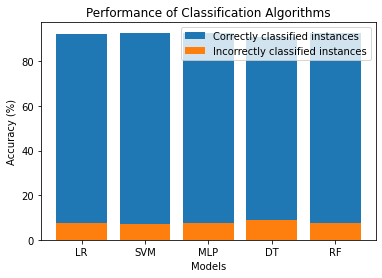

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

models = ["LR", "SVM", "MLP", "DT", "RF"]
accuracy = [a*100 for a in [lr_acc, svm_acc, mlp_acc, dt_acc, rf_acc]]
incorrect = [100-a for a in accuracy]
xpos = np.arange(len(models))

plt.xticks(xpos, models)
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Performance of Classification Algorithms")
plt.bar(xpos, accuracy, label="Correctly classified instances")
plt.bar(xpos, incorrect, label="Incorrectly classified instances")
plt.legend(loc="best")
ax = plt.gca()

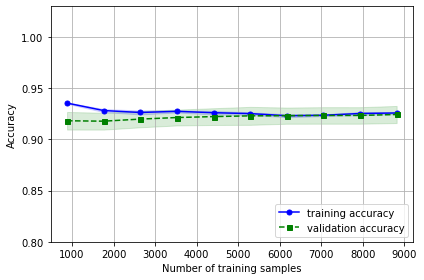

In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=lr,
                               X=X_train_std,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1., 10),
                               cv=10,
                               scoring='accuracy',
                               n_jobs=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

C:\Users\Matthew Zlibut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Matthew Zlibut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Matthew Zlibut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Matthew Zlibut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Matthew Zlibut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Matthew Zlibut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Matthew Zlibut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Matthew Zlibut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

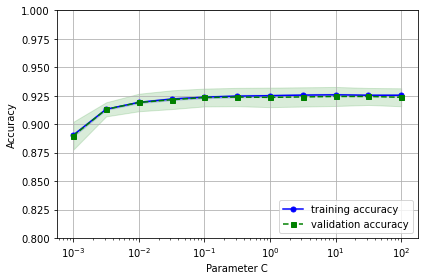

In [15]:
from sklearn.model_selection import validation_curve


#param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_range = np.logspace(-3, 2, 11)
# param_range = [6,7,8, 9, 10, 11]
train_scores, test_scores = validation_curve(
                estimator=lr, 
                X=X_train_std, 
                y=y_train, 
                param_name= 'C',
                param_range = param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()